In [75]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [77]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [ ]:
data['target'] #label data

In [ ]:
data['data'] #feature data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [82]:
clf = LinearSVC() #training
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [83]:
clf.score(X_test, y_test) #accuracy

0.956140350877193

In [84]:
clf.predict([X_test[0]]) #prediction

array([1])

In [85]:
                                               #sample of the data
explainer = shap.KernelExplainer(clf.predict,shap.kmeans(X_train, 10))

In [86]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

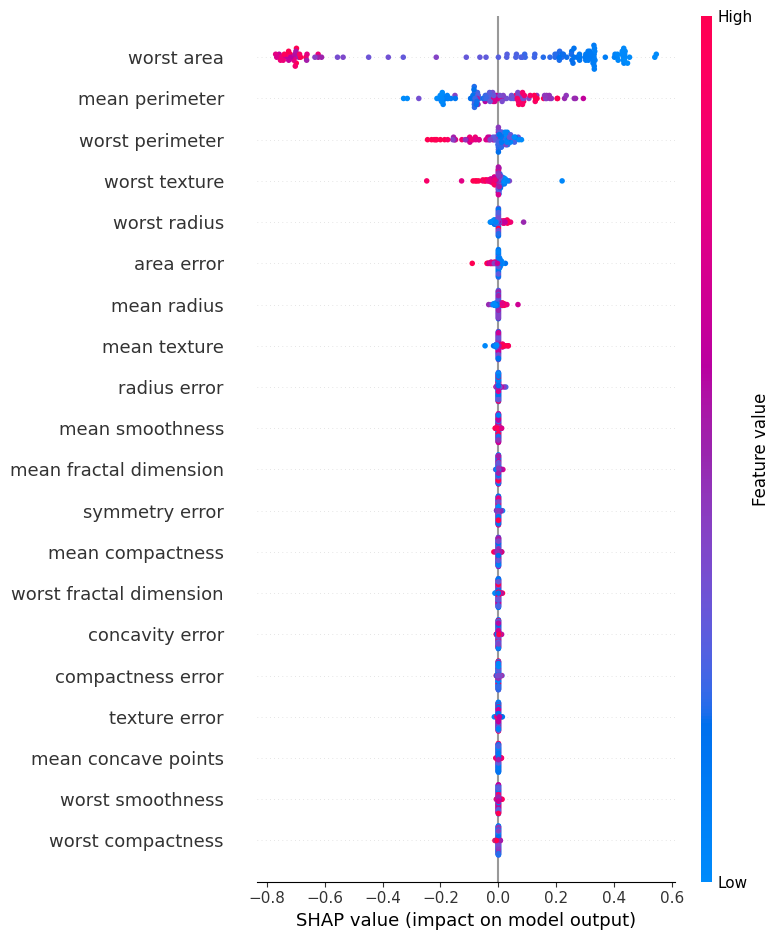

In [88]:
shap.summary_plot(shap_values,X_test, feature_names = data['feature_names'])

#From this plot i can see what features are the most relevant

In [91]:
# If i wanted to check a single instace (Example)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], X_test[1], feature_names = data['feature_names'])

In [92]:
mean_abs_shap_values = np.abs(shap_values).mean(axis = 0)

In [94]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)

sorted_feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

In [99]:
#Print the level of importance of each feature

for feature, importance in sorted_feature_importances:
  print(feature,":", importance)

worst area : 0.40192579835129844
mean perimeter : 0.10456423801264371
worst perimeter : 0.05046624016053277
worst texture : 0.01943337957395217
worst radius : 0.010497680888672029
area error : 0.008205561309353874
mean radius : 0.007549911570487584
mean texture : 0.005566049611273823
radius error : 0.0014059776514274754
mean smoothness : 0.0011934845676470828
mean fractal dimension : 0.001111278858159866
symmetry error : 0.0010555429536436357
mean compactness : 0.0010486229285233501
worst fractal dimension : 0.0009701539349114118
concavity error : 0.0009630145702681527
compactness error : 0.0009586524933122235
texture error : 0.0009565707169580654
mean concave points : 0.0009182677490392763
worst smoothness : 0.0009138813313340874
worst compactness : 0.0009065330645249044
mean concavity : 0.0009059015045247474
mean area : 0.0008827990312054704
worst concave points : 0.0008709459395368057
perimeter error : 0.0008540464229349852
concave points error : 0.000839434498691126
fractal dimensi